<h2>1.a Derivatives</h2>

<h3>Simple search algorithms</h3>
f(x) = -x<sup>4</sup> + 2x<sup>3</sup> + 2x<sup>2</sup> - x
<h3>Derivative</h3>
f<sup>'</sup>(x) = -4x<sup>3</sup> + 6x<sup>2</sup> + 4x - 1


<h2>1.b Plotting</h2>

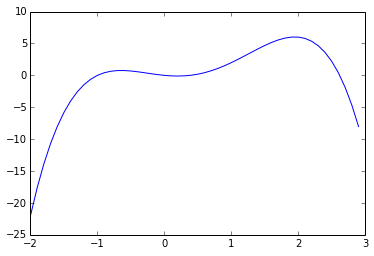

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

x = np.arange(-2, 3, 0.1)
y = -x**4 + 2*x**3 + 2*x**2 - x

plt.plot(x,y)

<h2>1.c Gradient Ascent</h2>
The algorithm takes a random starting point in the interval between -2.0 and 3.0. The default step is 0.1.
The first step is checking left and right by taking one step in each direction. Since we are maximizing, we choose the direction where x returns a higher y.
The first step is the max step. If the next step is bigger than the max step, we continue walking up and switching max step with the current step. As soon as the next step is smaller than max step it means we are descending. The search is over here and the last step is the (local) maximum.


Random starting point: ( 2.7 , -1.9  )
Number of steps: 8
Steps: [(2.7, -1.9), (2.6, 0.37), (2.5, 2.19), (2.4, 3.59), (2.3, 4.63), (2.2, 5.35), (2.1, 5.79), (2.0, 6.0), (1.9, 6.01)]

Local maximum: 1.9 6.01


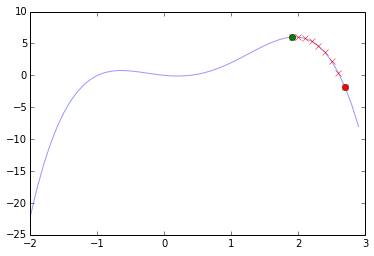

In [22]:
x_list = []
y_list = []

def funk(x):
    return round(-x**4 + 2*x**3 + 2*x**2 - x, 2)

def append_to_list(x, y):
    x_list.append(x)
    y_list.append(y)
    
step = 0.1

starting_x = round(float(random.randrange(-20, 33, step*10))/10, 1) #random point is picked
starting_y = funk(starting_x)
append_to_list(starting_x, starting_y)
print "Random starting point: (", starting_x, ",", starting_y, " )"

#check one step left and one step right
left_x, right_x = starting_x - step, starting_x + step
left_y, right_y = funk(left_x), funk(right_x)
#print "Left step: ", left_x, left_y
#print "Right step: ", right_x, right_y

#if the initial value is already bigger than steps left or right it is the local maximum.
if(starting_y >= max(left_y, right_y)):
    print("MAX is the initial value!!")
    print(zip(x_list, y_list))
else:
    #first step in both directions determines in which direction we will go
    if left_y > right_y:
        dir = -1
    elif left_y < right_y:
        dir = 1
    else:
        print("Not able to find local maximum because both steps are equal - assume maximum or minimum.")

    #now we have the direction and we are stepping until direction_y_next_step is bigger than direction_y
    max_x = starting_x
    max_y = starting_y

    step_x = round(starting_x  + dir*step, 1)
    step_y = funk(step_x)

    i = 0 #step_counter
    while (step_y > max_y):
        append_to_list(step_x, step_y)
        max_y = step_y
        step_x = round(step_x + dir*step, 1)
        step_y = funk(step_x)
        i += 1

local_max_x, local_max_y = x_list[-1], y_list[-1]        
        
print "Number of steps:", i
print "Steps:", zip(x_list, y_list)
print "\nLocal maximum:", local_max_x, local_max_y

plt.plot(x, y, "#9999FF", starting_x, starting_y, "ro", x_list, y_list, "rx", local_max_x, local_max_y, "go")

The choice of starting point determines whether the algorithm finds global maximum or "only" local maximum.<br>
Finding maximum or approximation of it depends on the step size. A step size too big would return an approximate maximum while a small step would return a more precise maximum.

A starting point where the algorithm would not be able to find a local maximum might happen if the step size is too small and the algorithm, when checking for direction, establishes that neither direction is a step up (ascent). This can be understood, by the algorithm, that we are on a flat area, either at the minimum or maximum.

<h2>1.d Exhaustive Search</h2>
Exhaustive search checks every single solution. It always finds the global maximum but at a high cost.

(2.0, 6.0)
Time: 0.757932662964 ms


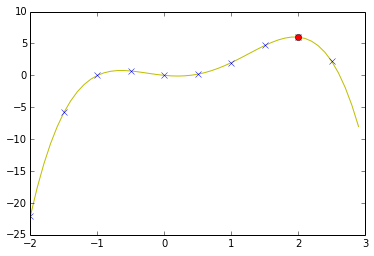

In [23]:
#exhaustive search
import time
step = 0.5
start = time.time()
x_es = np.arange(-2, 3, step)
y_es = -1*x_es**4 + 2*x_es**3 + 2*x_es**2 - x_es
list = zip(x_es, y_es)
y_max = -25
x_max = -2
for x_, y_ in list:
    if(y_ > y_max):
        y_max = y_
        x_max = x_
print (x_max, y_max)
end = time.time()
print "Time:", (end - start)*1000, "ms"
plt.plot(x,y, "y", x_es, y_es, "bx", x_max, y_max, "ro")

<h2>1.e Greedy Search and Hill </h2>

<h2>1.f Possible improvements</h2>
<b>Exploration</b> - trying out new solutions in the search space - for example exhaustive search

<b>Exploitation</b> - trying out local variations of the current best solution - for example hill climbing

Combination of both is ideal.

Perhaps one improvement of gradient ascent, greedy search and hill climbing (exploitation algorithms) to use exploration at the beginning to improve the first, random, step.

<h2>1.g Exhaustive search vs. simulated annealing</h2>

<b>Exhaustive search:</b>
<ul>
  <li>Tries every solution</li>
  <li>Guaranteed to find global optimum</li>
  <li>Impractical for problems with a lot of data</li>
</ul>
<b>Simulated annealing:</b>
<ul>
  <li>Stohastic method based (randomness)</li>
</ul>

Since simulated annealing is based on randomness which means the end result is an approximate solution. In the case of algorithm in 1.d, since we have a small dataset and the compute time is not high, exhaustive search would be the best option. Maybe not the most efficient in all cases, but the cost is minimal. And the global optimum (maximum) is guaranteed.